In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [9]:
df =pd.read_csv('E:\\internship\\archive.zip')

In [10]:
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [11]:
df.shape


(500, 2)

In [12]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [13]:
#exploratory data analysis(EDA)

In [14]:
#A: Correaltion Matrix

In [15]:
correlation = df.corr()
print("Correlation Matrix:")
display(correlation)
print(f"\ncorrelation between Temperature and Revenue: {correlation.loc ['Temperature', 'Revenue']:.2f}")

Correlation Matrix:


,Temperature,Revenue
Temperature,1.000000,0.989841
Revenue,0.989841,1.000000



correlation between Temperature and Revenue: 0.99


In [16]:
#Visualizing the Relationship(Scatter Plot)

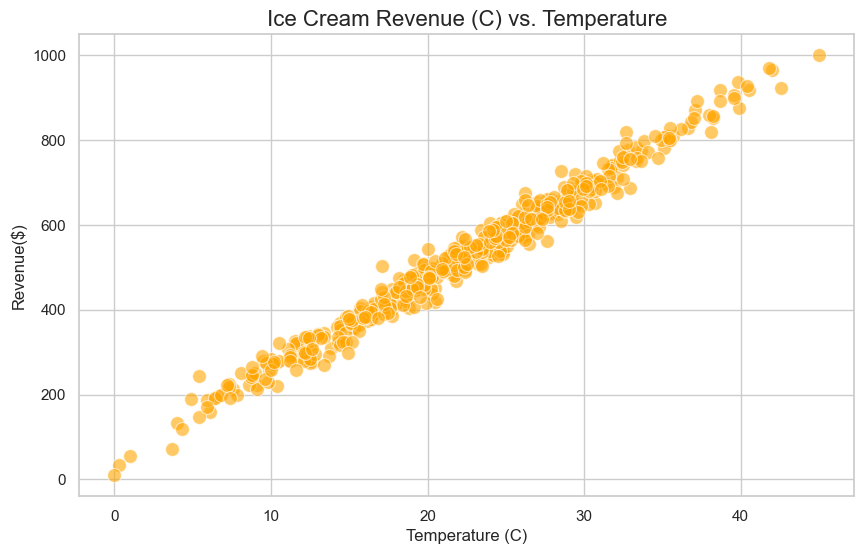

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y = 'Revenue', data=df ,color='orange', s=100 , alpha=0.6) 
plt.title('Ice Cream Revenue (C) vs. Temperature' , fontsize =16)
plt.xlabel('Temperature (C)', fontsize=12)
plt.ylabel('Revenue($)', fontsize=12)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X = df[[ 'Temperature' ]] # 2D array needed for sklearn
y = df[ 'Revenue' ]
# Split data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training shape: {X_train.shape}")
print (f"Testing shape: {X_test. shape}")

Training shape: (400, 1)
Testing shape: (100, 1)


In [28]:
X.shape

(500, 1)

In [29]:
X_train.shape

(400, 1)

In [30]:
#Model Training

In [31]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Trained Successfully!")
print(f"Intercept (c): {model.intercept_:.2f}")
print(f"Coefficient (Slope m): {model.coef_[0]:.2f}")

Model Trained Successfully!
Intercept (c): 46.18
Coefficient (Slope m): 21.38


In [38]:
#Model Evaluation 


In [39]:
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_pred=model.predict(X_test)

In [42]:
y_pred

array([683.42156759, 632.09996584, 559.39436335, 499.5191613 ,
       614.99276525, 304.92475465, 285.67915399, 315.61675502,
       505.93436152, 685.55996766, 724.05116898, 401.15275794,
       431.09035897, 672.72956723,  52.59354603, 200.14315107,
       523.04156211, 563.6711635 , 585.05516423, 683.42156759,
       557.25596328, 783.92637103, 655.62236664, 570.08636372,
       912.23037541, 666.31436701, 315.61675502, 632.09996584,
       732.60476927, 698.3903681 , 435.36715911, 471.71996035,
       711.22076854, 801.03357161, 640.65356613, 493.10396109,
       745.43516971, 317.75515509, 262.15675319, 131.71434873,
       582.91676416, 230.08075209, 548.70236299, 392.59915765,
       437.50555919, 593.60876452, 572.22476379, 125.29914851,
       475.9967605 , 531.5951624 , 623.54636554, 503.79596145,
       484.55036079, 499.5191613 , 550.84076306, 632.09996584,
       574.36316386, 679.14476745, 172.34395012, 662.03756686,
       585.05516423, 704.80556832, 535.87196255, 629.96

In [43]:
y_test

361    660
73     624
374    560
155    498
104    628
      ... 
347    565
86     644
75     654
438    413
15     470
Name: Revenue, Length: 100, dtype: int64

In [44]:
mean_absolute_error(y_test,y_pred)

19.195652579103704

In [46]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared Score: {r2:.4f} (The model explains {r2*100:.2f}% of the variance)")
print(f"Mean Absolute Error: {mae:.2f}")

R-squared Score: 0.9772 (The model explains 97.72% of the variance)
Mean Absolute Error: 19.20


In [47]:
#Visualization of the Best Fit Line

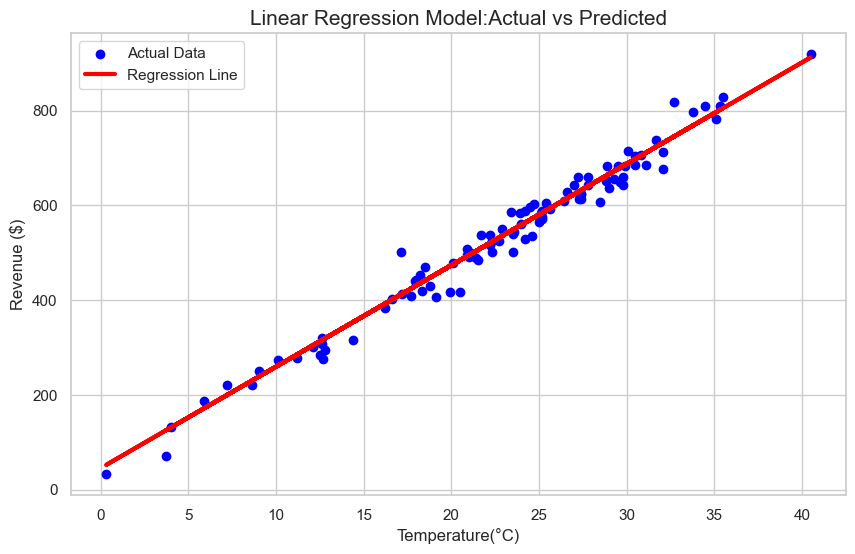

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color = 'blue', label ='Actual Data')
plt.plot(X_test, y_pred, color = 'red', linewidth=3, label='Regression Line')
plt.title('Linear Regression Model:Actual vs Predicted', fontsize=15)
plt.xlabel('Temperature(°C)')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()

In [51]:
#Saving the Model

In [52]:
import joblib

In [53]:
joblib.dump(model, 'ice_cream_sales_model.pkl')
print("Model saved as 'ice_cream_sales_model.pkl'")

Model saved as 'ice_cream_sales_model.pkl'


In [54]:
#Inference (Prediction on new Data)